In [1]:
# Instalar librerías necesarias
!pip install pennylane sympy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 18.7 MB/s eta 0:00:00


In [5]:
from sklearn.model_selection import train_test_split
# Import MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler # Import the necessary class
import matplotlib.pyplot as plt # import matplotlib for plotting
from sklearn.datasets import load_iris
import numpy as np

# Cargar y preparar el conjunto de datos Iris
iris = load_iris()
X = iris.data[:, :2]  # Usar solo las primeras dos características: (x1, x2)
Y = iris.target  # Clases: 0, 1, 2

# Filtrar solo las primeras dos clases
X = X[Y != 2]  # Eliminar clase "2"
Y = Y[Y != 2]  # Mantener solo clases "0" y "1"
Y = np.where(Y == 0, -1, 1)  # Convertir etiquetas a -1 y 1

# Dividir en conjuntos de entrenamiento (80%) y validación (20%)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=610014)

# Escalar las características al rango [0, 1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)  # Escalar los datos de entrenamiento
X_val = scaler.transform(X_val)          # Escalar los datos de validación (usando el mismo scaler)
X_all = scaler.fit_transform(X)          # Escalar todos los puntos seleccionados

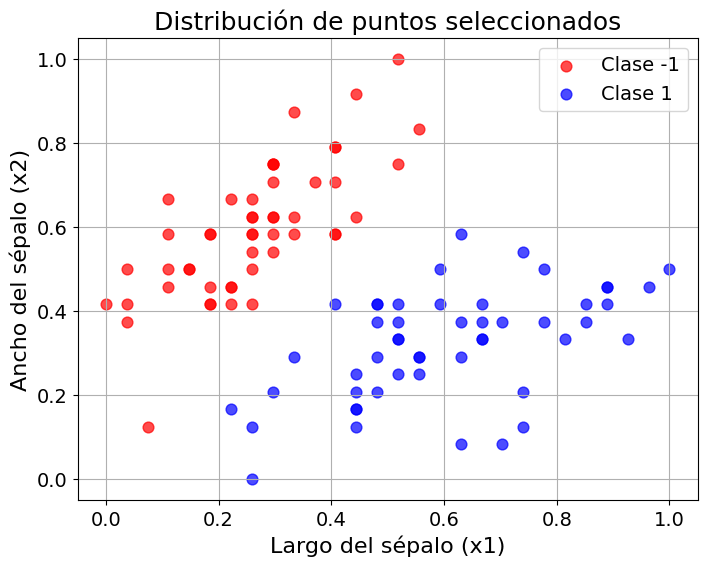

In [6]:
import numpy as np

#Mostrar todos los puntos seleccionados con etiquetas más grandes
plt.figure(figsize=(8, 6))

for clase, color, etiqueta in zip([-1, 1], ['red', 'blue'], ['Clase -1', 'Clase 1']):
    indices = np.where(Y == clase)[0]
    plt.scatter(X_all[indices, 0], X_all[indices, 1], c=color, label=etiqueta, alpha=0.7, s=60)

# Aumentar tamaño de etiquetas y título
plt.title("Distribución de puntos seleccionados", fontsize=18)
plt.xlabel("Largo del sépalo (x1)", fontsize=16)
plt.ylabel("Ancho del sépalo (x2)", fontsize=16)

# Aumentar tamaño de valores en los ejes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Aumentar tamaño de la leyenda
plt.legend(fontsize=14)

# Agregar cuadrícula para mejor visualización
plt.grid(True)

# Mostrar la gráfica
plt.show()



---



# SVM y perceptrón

El conjunto de datos parece ser linealmente separable (precisión = 100%).


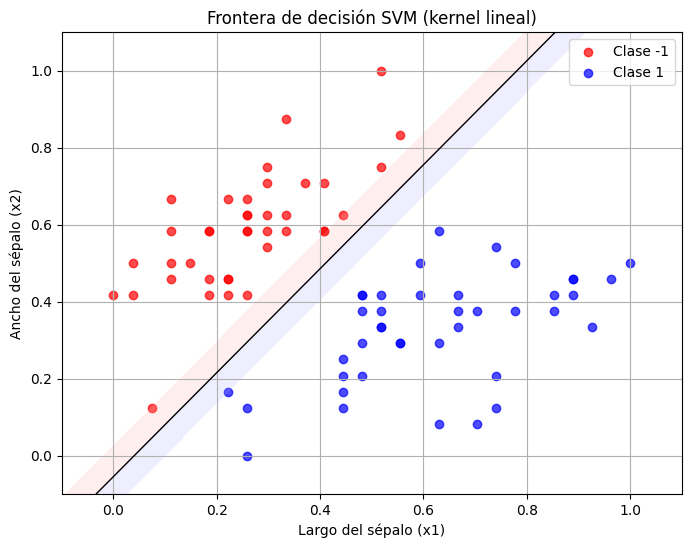

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Entrenar una SVM con kernel lineal
svm_linear = SVC(kernel='linear', C=1e10)  # C alto para evitar regularización
svm_linear.fit(X_train, Y_train)

# Predicciones en el conjunto de validación
Y_pred = svm_linear.predict(X_val)

# Calcular precisión en los datos de validación
accuracy = accuracy_score(Y_val, Y_pred)

# Comprobar separabilidad lineal
if accuracy == 1.0:
    print("El conjunto de datos parece ser linealmente separable (precisión = 100%).")
else:
    print("El conjunto de datos NO es linealmente separable (precisión =", accuracy * 100, "%).")

# Visualizar la frontera de decisión
plt.figure(figsize=(8, 6))
for clase, color, etiqueta in zip([-1, 1], ['red', 'blue'], ['Clase -1', 'Clase 1']):
    indices = np.where(Y_train == clase)[0]
    plt.scatter(X_train[indices, 0], X_train[indices, 1], c=color, label=etiqueta, alpha=0.7)

# Crear una malla para dibujar la frontera de decisión
x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = svm_linear.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar la frontera de decisión
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['#FFAAAA', '#AAAAFF'], alpha=0.2)
plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=1)

plt.title("Frontera de decisión SVM (kernel lineal)")
plt.xlabel("Largo del sépalo (x1)")
plt.ylabel("Ancho del sépalo (x2)")
plt.legend()
plt.grid(True)
plt.show()

Aplicando una SVM con kernel lineal observamos que los datos son linealmente separables, por lo que el perceptrón cuántico debería obtener una precisión del 100%.

# Perceptrón cuántico

In [23]:
# Importar librerías
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from pennylane.optimize import RMSPropOptimizer

# Configuración del dispositivo cuántico con 2 qubits
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Definir el perceptrón cuántico con una codificación alternativa
@qml.qnode(dev)
def quantum_perceptron(weights, x):
    # Codificación alternativa: Combinación de RX y RZ
    for i in range(n_qubits):
        qml.RX(x[i], wires=i)
        qml.RZ(x[i], wires=i)

    # Aplicar una capa inicial de entrelazamiento
    qml.CNOT(wires=[0, 1])

    # Aplicar rotaciones parametrizadas
    for i in range(n_qubits):
        qml.RY(weights[i], wires=i)
        qml.RZ(weights[i + n_qubits], wires=i)

    # Entrelazar los qubits (de nuevo)
    qml.CNOT(wires=[1, 0])

    # Medición del primer qubit
    return qml.expval(qml.PauliZ(0))

# Función de costo
def cost_function(weights, X, Y):
    loss = 0
    for x, y in zip(X, Y):
        pred = quantum_perceptron(weights, x)
        loss += (pred - y) ** 2
    return loss / len(X)

# Inicializar pesos aleatorios en un rango más amplio
weights = np.random.uniform(-np.pi, np.pi, 2 * n_qubits)

# Optimizador
opt = qml.RMSPropOptimizer(stepsize=0.02, decay=0.9)
n_epochs = 250
losses = []

for epoch in range(n_epochs):
    weights = opt.step(lambda w: cost_function(w, X_train, Y_train), weights)
    loss = cost_function(weights, X_train, Y_train)
    losses.append(loss)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

Epoch 0: Loss = 1.9238
Epoch 10: Loss = 1.4132
Epoch 20: Loss = 1.0477
Epoch 30: Loss = 0.8603
Epoch 40: Loss = 0.7789
Epoch 50: Loss = 0.7459
Epoch 60: Loss = 0.7275
Epoch 70: Loss = 0.7113
Epoch 80: Loss = 0.6997
Epoch 90: Loss = 0.6953
Epoch 100: Loss = 0.6947
Epoch 110: Loss = 0.6947
Epoch 120: Loss = 0.6947
Epoch 130: Loss = 0.6947
Epoch 140: Loss = 0.6947
Epoch 150: Loss = 0.6949
Epoch 160: Loss = 0.6947
Epoch 170: Loss = 0.6947
Epoch 180: Loss = 0.6949
Epoch 190: Loss = 0.6948
Epoch 200: Loss = 0.6948
Epoch 210: Loss = 0.6948
Epoch 220: Loss = 0.6948
Epoch 230: Loss = 0.6948
Epoch 240: Loss = 0.6948


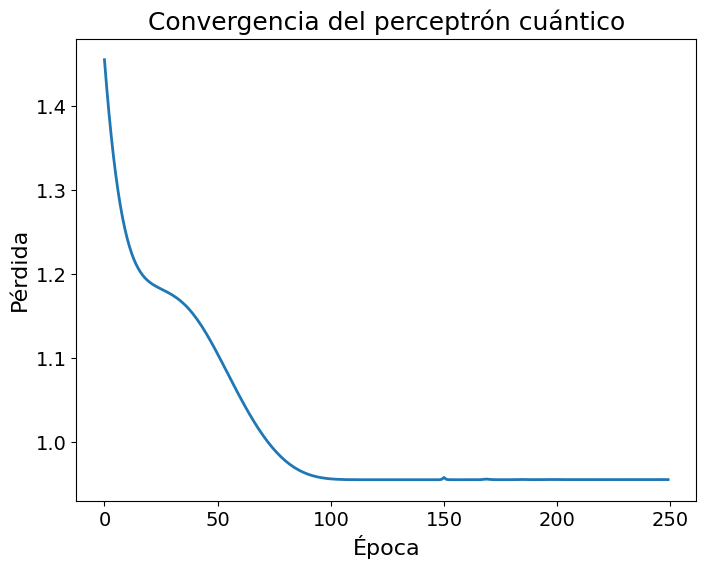

In [18]:
import matplotlib.pyplot as plt

# Graficar la pérdida durante el entrenamiento con fuentes más grandes
plt.figure(figsize=(8, 6))  # Ajustar tamaño de la figura
plt.plot(losses, linewidth=2)  # Hacer la línea más gruesa para mejor visibilidad

# Aumentar tamaño de etiquetas
plt.xlabel("Época", fontsize=16)
plt.ylabel("Pérdida", fontsize=16)
plt.title("Convergencia del perceptrón cuántico", fontsize=18)

# Aumentar tamaño de los valores en los ejes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Mostrar la gráfica
plt.grid(False)  # Opcional: agregar una cuadrícula para mejor visualización
plt.show()

In [24]:
# Función para clasificar las predicciones
def classify(pred):
    return -1 if pred < 0 else 1  # Umbral en 0

# Evaluar precisión en validación
correct_predictions = 0
for x, y in zip(X_val, Y_val):
    pred = quantum_perceptron(weights, x)  # Predicción continua
    clasificacion = classify(pred)         # Convertir a clase -1 o 1
    if clasificacion == y:
        correct_predictions += 1

# Calcular la precisión
accuracy = correct_predictions / len(X_val)
print(f"Precisión en validación: {accuracy * 100:.2f}%")

Precisión en validación: 100.00%




---



# Frontera de decisión perceptrón clásico

Época 0: Errores = 12
Convergencia alcanzada en la época 1.
Precisión en validación: 100.00%


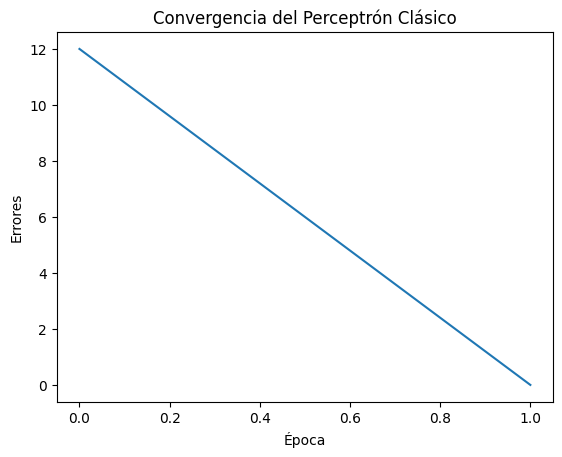

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Cargar y preparar el conjunto de datos Iris
iris = load_iris()
X = iris.data[:, :2]  # Usar solo las primeras dos características: (x1, x2)
Y = iris.target  # Clases: 0, 1, 2

# Filtrar solo las primeras dos clases
X = X[Y != 2]  # Eliminar clase "2"
Y = Y[Y != 2]  # Mantener solo clases "0" y "1"
Y = np.where(Y == 0, -1, 1)  # Convertir etiquetas a -1 y 1

# Dividir en conjuntos de entrenamiento (80%) y validación (20%)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=610014)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# ---------- IMPLEMENTACIÓN DEL PERCEPTRÓN CLÁSICO ----------
class Perceptron:
    def __init__(self, n_features, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate  # Tasa de aprendizaje
        self.epochs = epochs  # Número de iteraciones
        self.weights = np.random.uniform(-0.1, 0.1, n_features)  # Pesos aleatorios
        self.bias = np.random.uniform(-0.1, 0.1)  # Sesgo aleatorio

    def activation(self, x):
        """Función de activación (signo)"""
        return np.where(x >= 0, 1, -1)

    def predict(self, X):
        """Realiza la predicción de la salida"""
        return self.activation(np.dot(X, self.weights) + self.bias)

    def train(self, X_train, Y_train):
        """Entrena el perceptrón usando descenso de gradiente estocástico"""
        losses = []
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X_train)):  # Recorrer cada punto de entrenamiento
                x_i, y_i = X_train[i], Y_train[i]
                prediction = self.predict(x_i)
                error = y_i - prediction  # Error de clasificación

                # Actualización de pesos y sesgo si hay error
                if error != 0:
                    self.weights += self.learning_rate * error * x_i
                    self.bias += self.learning_rate * error
                    total_error += abs(error)  # Sumar errores absolutos

            losses.append(total_error)  # Guardar la cantidad de errores en la época

            # Mostrar progreso cada 10 épocas
            if epoch % 10 == 0:
                print(f"Época {epoch}: Errores = {total_error}")

            # Criterio de parada: Si no hay errores, el modelo ha convergido
            if total_error == 0:
                print(f"Convergencia alcanzada en la época {epoch}.")
                break

        return losses

# Crear el perceptrón y entrenarlo
perceptron = Perceptron(n_features=2, learning_rate=0.1, epochs=100)
losses = perceptron.train(X_train, Y_train)

# Evaluar precisión en validación
Y_pred = perceptron.predict(X_val)
precision_val = np.mean(Y_pred == Y_val)
print(f"Precisión en validación: {precision_val * 100:.2f}%")

# Graficar la convergencia del modelo
plt.plot(losses)
plt.xlabel("Época")
plt.ylabel("Errores")
plt.title("Convergencia del Perceptrón Clásico")
plt.show()

In [52]:
# Cargar y preparar el conjunto de datos Iris
iris = load_iris()
X = iris.data[:, :2]  # Usar solo las primeras dos características: (x1, x2)
Y = iris.target  # Clases: 0, 1, 2

# Filtrar solo las primeras dos clases
X = X[Y != 2]  # Eliminar clase "2"
Y = Y[Y != 2]  # Mantener solo clases "0" y "1"
Y = np.where(Y == 0, -1, 1)  # Convertir etiquetas a -1 y 1

# Dividir en conjuntos de entrenamiento (80%) y validación (20%)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=610014)

X_train_original = X_train.copy()
X_val_original = X_val.copy()

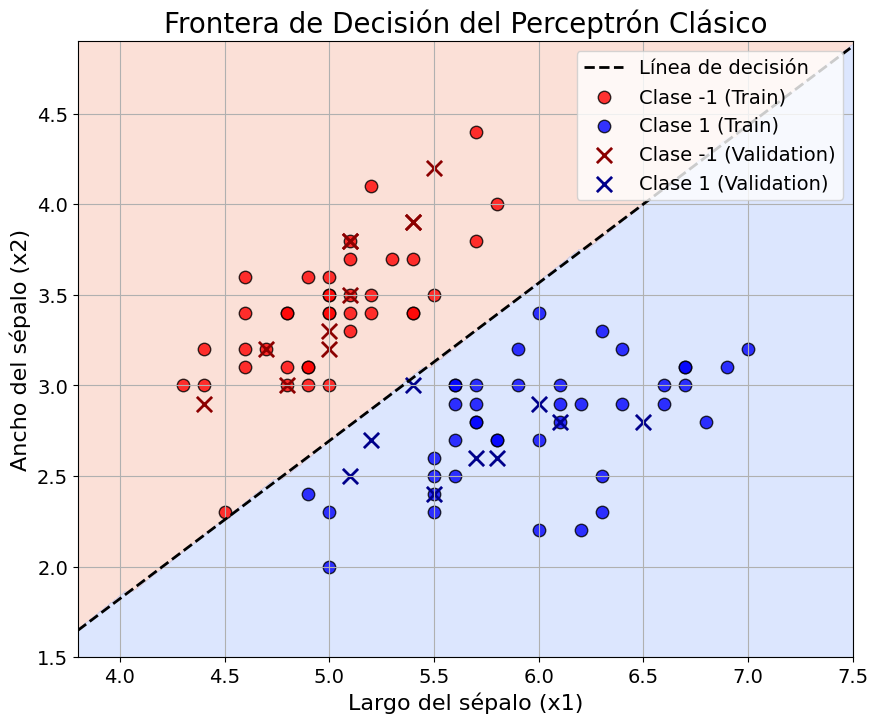

In [49]:
# Crear una malla bidimensional para colorear regiones usando datos desescalados
xx, yy = np.meshgrid(
    np.linspace(X_train_original[:, 0].min() - 0.5, X_train_original[:, 0].max() + 0.5, 100),
    np.linspace(X_train_original[:, 1].min() - 0.5, X_train_original[:, 1].max() + 0.5, 100)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]  # Combinar en pares (x1, x2)

# Escalar la malla para usarla en el modelo
grid_points_scaled = scaler.transform(grid_points)

# Calcular predicciones para la malla escalada
predictions = perceptron.predict(grid_points_scaled).reshape(xx.shape)

# Calcular la línea de decisión en el espacio escalado
x_min_scaled, x_max_scaled = grid_points_scaled[:, 0].min(), grid_points_scaled[:, 0].max()
slope_scaled = -perceptron.weights[0] / perceptron.weights[1]  # Pendiente en el espacio escalado
intercept_scaled = -perceptron.bias / perceptron.weights[1]    # Intersección en el espacio escalado
y_min_scaled = slope_scaled * x_min_scaled + intercept_scaled
y_max_scaled = slope_scaled * x_max_scaled + intercept_scaled

# Desescalar los puntos de la línea de decisión al espacio original
x_min_original, y_min_original = scaler.inverse_transform([[x_min_scaled, y_min_scaled]])[0]
x_max_original, y_max_original = scaler.inverse_transform([[x_max_scaled, y_max_scaled]])[0]

# Graficar la frontera de decisión
plt.figure(figsize=(10, 8))

# Dibujar la región clasificada (colores de fondo)
plt.contourf(xx, yy, predictions, levels=[-1, 0, 1], cmap='coolwarm_r', alpha=0.3)

# Dibujar la línea de decisión desescalada
plt.plot([x_min_original, x_max_original], [y_min_original, y_max_original], 'k--', linewidth=2, label="Línea de decisión")

# Graficar los puntos originales del conjunto de entrenamiento
for clase, color, etiqueta in zip([-1, 1], ['red', 'blue'], ['Clase -1 (Train)', 'Clase 1 (Train)']):
    indices = np.where(Y_train == clase)[0]
    plt.scatter(X_train_original[indices, 0], X_train_original[indices, 1], c=color, label=etiqueta, s=80, edgecolor='k', alpha=0.8)

# Graficar los puntos originales del conjunto de validación
for clase, color, etiqueta in zip([-1, 1], ['darkred', 'darkblue'], ['Clase -1 (Validation)', 'Clase 1 (Validation)']):
    indices = np.where(Y_val == clase)[0]
    plt.scatter(X_val_original[indices, 0], X_val_original[indices, 1], c=color, label=etiqueta, s=120, marker='x', linewidth=2, alpha=1.0)

# Ajustar los límites del gráfico al rango de los datos originales
plt.xlim([X_train_original[:, 0].min() - 0.5, X_train_original[:, 0].max() + 0.5])
plt.ylim([X_train_original[:, 1].min() - 0.5, X_train_original[:, 1].max() + 0.5])

# Configurar el título, etiquetas y leyenda
plt.title("Frontera de Decisión del Perceptrón Clásico", fontsize=20)
plt.xlabel("Largo del sépalo (x1)", fontsize=16)
plt.ylabel("Ancho del sépalo (x2)", fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='upper right')
plt.grid(True)

# Mostrar la gráfica
plt.show()

# Frontera de decisión perceptrón cuántico

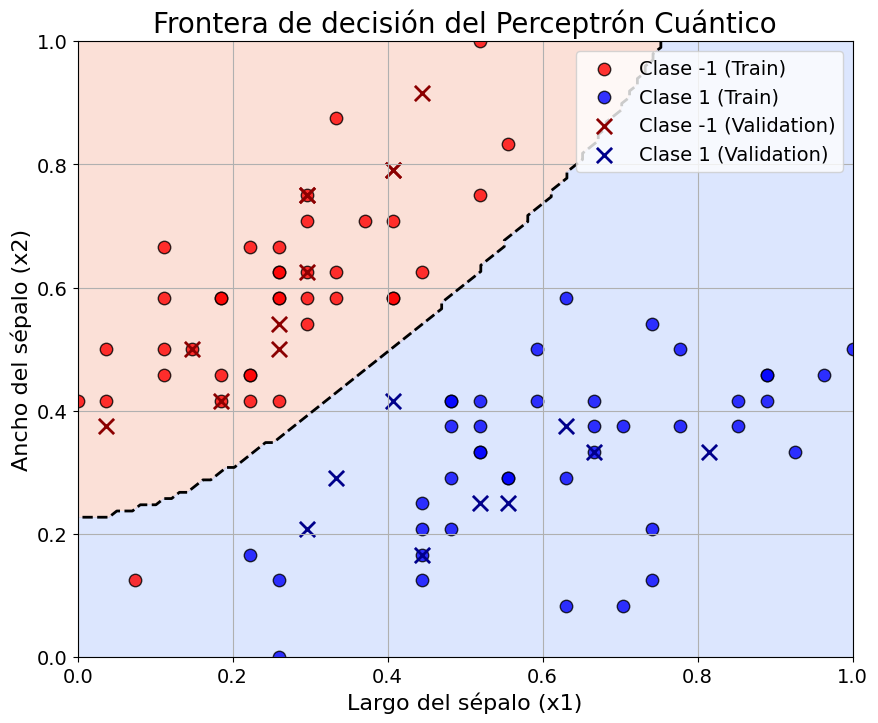

In [28]:
# Crear una malla bidimensional en el rango escalado [0, 1]
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]  # Combinar en pares (x1, x2)

# Calcular predicciones continuas para los puntos de la malla
predictions = np.array([quantum_perceptron(weights, point) for point in grid_points])

# Clasificar predicciones en -1 o 1
predictions_classified = np.where(predictions >= 0, 1, -1).reshape(xx.shape)

# Graficar la frontera de decisión
plt.figure(figsize=(10, 8))

# Dibujar la región clasificada (colores de fondo)
plt.contourf(xx, yy, predictions_classified, levels=[-1, 0, 1], cmap='coolwarm_r', alpha=0.3)

# Dibujar la línea de decisión (nivel 0)
plt.contour(xx, yy, predictions_classified, levels=[0], colors='black', linestyles='--', linewidths=2)

# Graficar los puntos del conjunto de entrenamiento
for clase, color, etiqueta in zip([-1, 1], ['red', 'blue'], ['Clase -1 (Train)', 'Clase 1 (Train)']):
    indices = np.where(Y_train == clase)[0]
    plt.scatter(X_train[indices, 0], X_train[indices, 1], c=color, label=etiqueta, s=80, edgecolor='k', alpha=0.8)

# Graficar los puntos del conjunto de validación
for clase, color, etiqueta in zip([-1, 1], ['darkred', 'darkblue'], ['Clase -1 (Validation)', 'Clase 1 (Validation)']):
    indices = np.where(Y_val == clase)[0]
    plt.scatter(X_val[indices, 0], X_val[indices, 1], c=color, label=etiqueta, s=120, marker='x', linewidth=2, alpha=1.0)

# Configurar el título, etiquetas y leyenda
plt.title("Frontera de decisión del Perceptrón Cuántico", fontsize=20)
plt.xlabel("Largo del sépalo (x1)", fontsize=16)
plt.ylabel("Ancho del sépalo (x2)", fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)

# Mostrar la gráfica
plt.show()

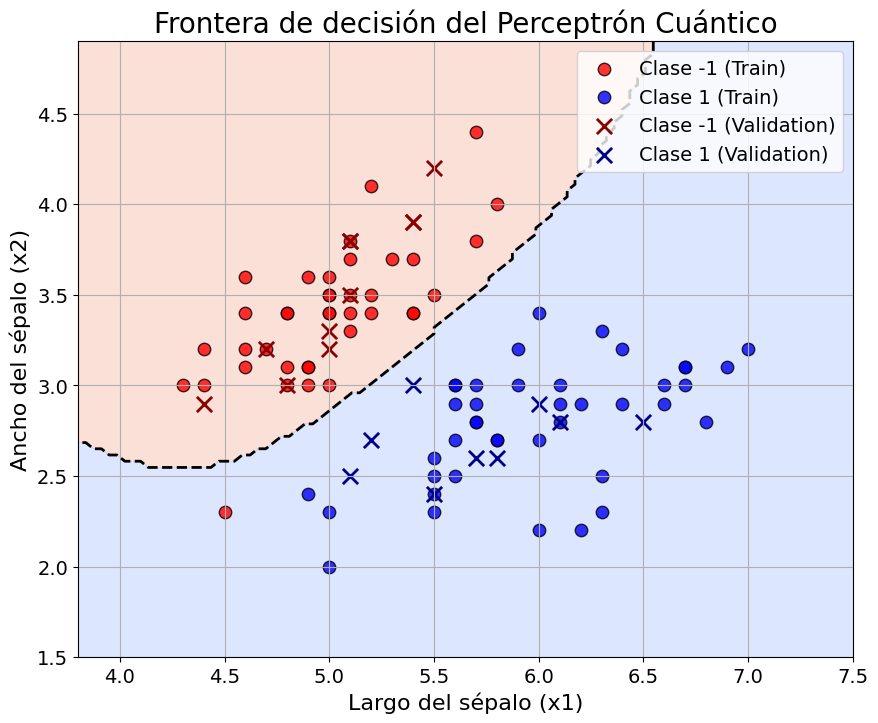

In [54]:
# Cargar y preparar el conjunto de datos Iris
iris = load_iris()
X = iris.data[:, :2]  # Usar solo las primeras dos características: (x1, x2)
Y = iris.target  # Clases: 0, 1, 2

# Filtrar solo las primeras dos clases
X = X[Y != 2]  # Eliminar clase "2"
Y = Y[Y != 2]  # Mantener solo clases "0" y "1"
Y = np.where(Y == 0, -1, 1)  # Convertir etiquetas a -1 y 1

# Dividir en conjuntos de entrenamiento (80%) y validación (20%)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=610014)

X_train_original = X_train.copy()
X_val_original = X_val.copy()


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


# Crear una malla bidimensional para colorear regiones usando el rango original (desescalado)
xx, yy = np.meshgrid(
    np.linspace(X_train_original[:, 0].min() - 0.5, X_train_original[:, 0].max() + 0.5, 100),
    np.linspace(X_train_original[:, 1].min() - 0.5, X_train_original[:, 1].max() + 0.5, 100)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]  # Combinar en pares (x1, x2)

# Escalar la malla para usarla en el modelo
grid_points_scaled = scaler.transform(grid_points)

# Calcular predicciones continuas para los puntos de la malla escalada
predictions = np.array([quantum_perceptron(weights, point) for point in grid_points_scaled])

# Clasificar predicciones en -1 o 1
predictions_classified = np.where(predictions >= 0, 1, -1).reshape(xx.shape)

# Graficar la frontera de decisión
plt.figure(figsize=(10, 8))

# Dibujar la región clasificada (colores de fondo)
plt.contourf(xx, yy, predictions_classified, levels=[-1, 0, 1], cmap='coolwarm_r', alpha=0.3)

# Dibujar la línea de decisión (nivel 0)
plt.contour(xx, yy, predictions_classified, levels=[0], colors='black', linestyles='--', linewidths=2)

# Graficar los puntos originales del conjunto de entrenamiento
for clase, color, etiqueta in zip([-1, 1], ['red', 'blue'], ['Clase -1 (Train)', 'Clase 1 (Train)']):
    indices = np.where(Y_train == clase)[0]
    plt.scatter(X_train_original[indices, 0], X_train_original[indices, 1], c=color, label=etiqueta, s=80, edgecolor='k', alpha=0.8)

# Graficar los puntos originales del conjunto de validación
for clase, color, etiqueta in zip([-1, 1], ['darkred', 'darkblue'], ['Clase -1 (Validation)', 'Clase 1 (Validation)']):
    indices = np.where(Y_val == clase)[0]
    plt.scatter(X_val_original[indices, 0], X_val_original[indices, 1], c=color, label=etiqueta, s=120, marker='x', linewidth=2, alpha=1.0)

# Ajustar los límites del gráfico al rango de los datos originales
plt.xlim([X_train_original[:, 0].min() - 0.5, X_train_original[:, 0].max() + 0.5])
plt.ylim([X_train_original[:, 1].min() - 0.5, X_train_original[:, 1].max() + 0.5])

# Configurar el título, etiquetas y leyenda
plt.title("Frontera de decisión del Perceptrón Cuántico", fontsize=20)
plt.xlabel("Largo del sépalo (x1)", fontsize=16)
plt.ylabel("Ancho del sépalo (x2)", fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='upper right')  # Leyenda en la parte superior derecha
plt.grid(True)

# Mostrar la gráfica
plt.show()